In [121]:
import pandas as pd
import seaborn as sns
import warnings

In [122]:
warnings.filterwarnings('ignore')

# Unsupervised Learning

In [123]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [124]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Subset & Data Scalling

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
df_subset = df[['credit_score','balance']]

In [127]:
ss = StandardScaler()

In [128]:
x_scaled = ss.fit_transform(df_subset)

# K-Means Clustering

In [129]:
from sklearn.cluster import KMeans

In [130]:
model_kmeans = KMeans(n_clusters = 3)

In [131]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [132]:
labels = model_kmeans.labels_

In [133]:
print(labels)

[0 1 1 ... 0 2 2]


## Buat Cross_Tab untuk membandingkan antar cluster

In [134]:
# Buat dataframe dengan label dan spesies dari iris sebagai kolom
df_kmeans = pd.DataFrame({'labels' : labels, 'churn' : df.churn})

In [135]:
# Buat Crosstab
ctl = pd.crosstab(df_kmeans['labels'], df_kmeans['churn'])

In [136]:
print(ctl)

churn      0    1
labels           
0       3197  531
1       2284  777
2       2482  729


## Melihat Centroid

In [137]:
import matplotlib.pyplot as plt

In [138]:
plt.style.use('ggplot')

In [139]:
# Untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [140]:
# Menampung semua koordinat dari semua centroid
centroids = model_kmeans.cluster_centers_

In [141]:
# Pisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

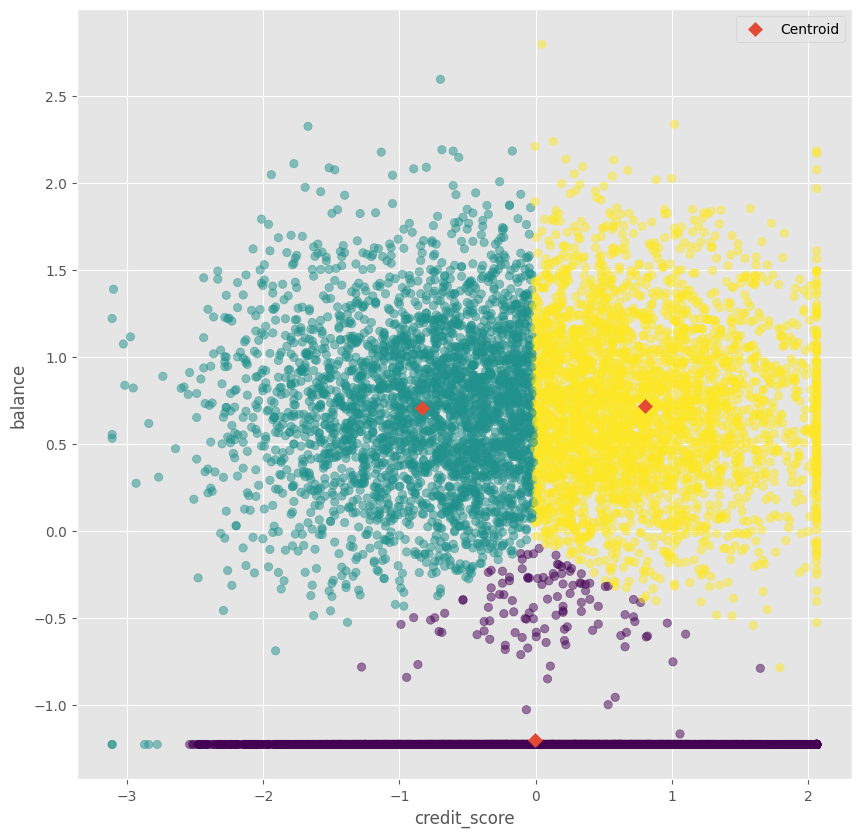

In [142]:
# Visualisasi Cluster
plt.figure(figsize=(10,10))

# Titik-titik data x dan y
plt.scatter(xs,ys,alpha=0.5,c=labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = 'Centroid', marker="D", s=50)

# Beri label
plt.xlabel("credit_score")
plt.ylabel("balance")

plt.legend()
plt.show()

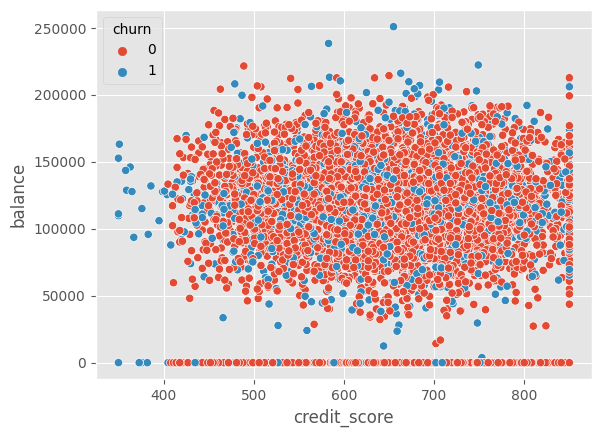

In [143]:
# Label Aktual
df_aktual = df[['credit_score','balance','churn']]
sns.scatterplot(x = 'credit_score', y = 'balance', data = df_aktual, hue = 'churn')
plt.show()

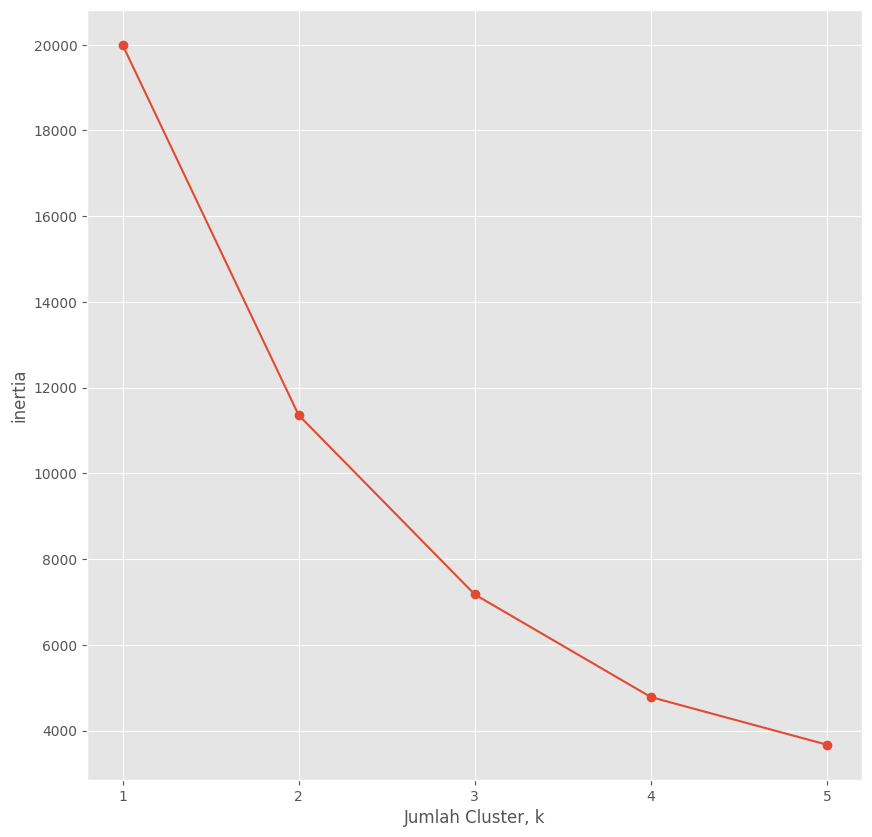

In [144]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Hierarchical Clustering

In [145]:
from sklearn.cluster import AgglomerativeClustering

In [146]:
hc_cluster = AgglomerativeClustering(n_clusters = 3)

In [147]:
agg_cluster = hc_cluster.fit_predict(x_scaled)

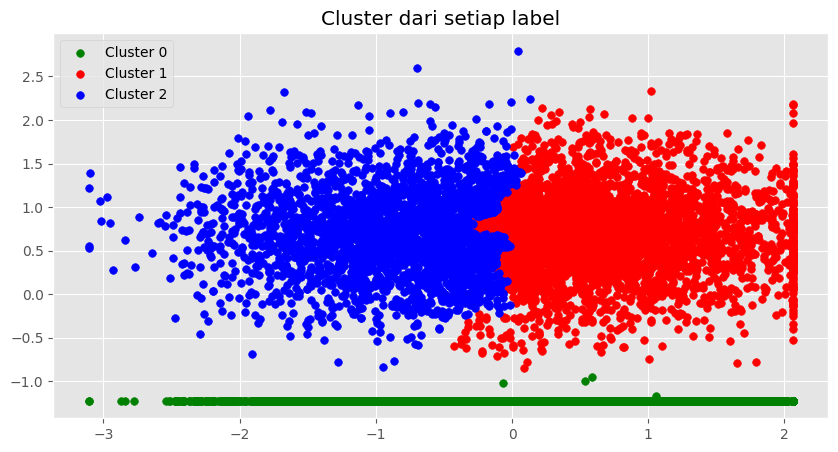

In [159]:
plt.figure(figsize=(10,5))

plt.scatter(x_scaled[agg_cluster == 0,0],
           x_scaled[agg_cluster == 0,1],
            c='green', s= 30, label = 'Cluster 0')
plt.scatter(x_scaled[agg_cluster == 1,0],
           x_scaled[agg_cluster == 1,1],
            c='red', s= 30, label = 'Cluster 1')
plt.scatter(x_scaled[agg_cluster == 2,0],
           x_scaled[agg_cluster == 2,1],
            c='blue', s= 30, label = 'Cluster 2')

plt.title("Cluster dari setiap label")
plt.legend()
plt.show()

# Dendrogram

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [150]:
merged = linkage(x_scaled, method = "ward")

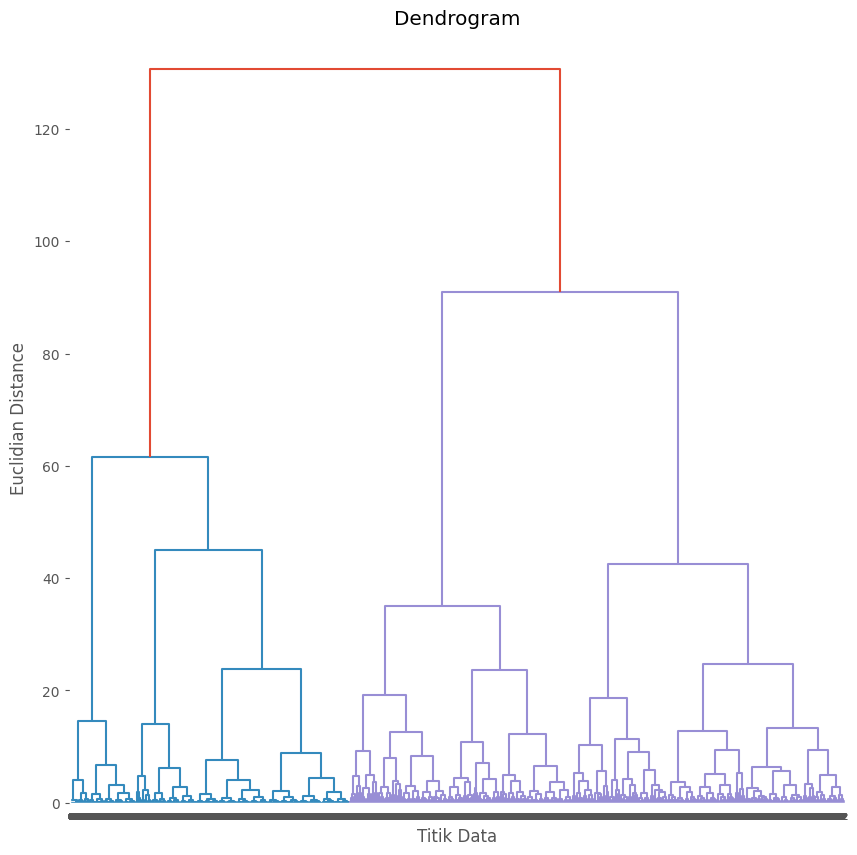

In [151]:
plt.figure(figsize=(10,10))
dendrogram(merged, leaf_rotation = 0, labels = labels, leaf_font_size = 6)
plt.xlabel("Titik Data")
plt.ylabel("Euclidian Distance")
plt.title('Dendrogram')
plt.show()

## Ambil label dari Cluster

In [152]:
from scipy.cluster.hierarchy import fcluster

In [153]:
labels2 = fcluster(merged, 5, criterion='distance')

In [154]:
df_h = pd.DataFrame({'labels' : labels2,'churn':df.churn})

In [155]:
ct2 = pd.crosstab(df_h['labels'],df_h['churn'])

In [156]:
print(ct2)

churn     0    1
labels          
1       218   31
2       168   29
3       358   60
4       157   36
5       180   25
6       313   59
7       266   32
8       537   93
9       347   56
10      575   81
11       93   58
12      163   43
13      140   38
14      101   31
15      175   67
16      243  104
17      258   78
18       43   16
19      218   76
20      261   68
21      164   55
22      288   90
23       35    7
24      184   49
25       86   31
26       58   18
27      107   31
28      198   42
29      102   49
30      166   60
31      277   95
32      202   56
33      194   43
34       47   11
35       54   22
36      233   61
37      135   34
38      214   71
39      103   48
40      302   83


<AxesSubplot:xlabel='credit_score', ylabel='balance'>

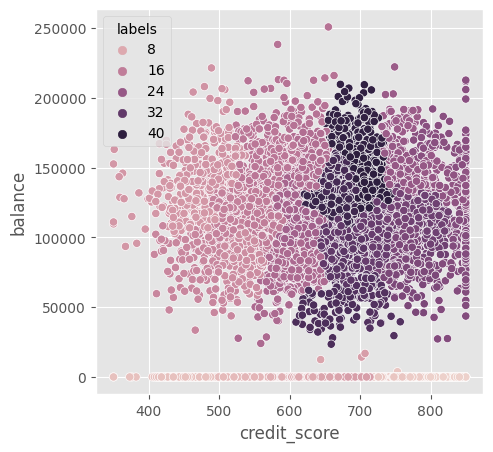

In [157]:
df_subset['labels'] = labels2
plt.figure(figsize =(5,5))
sns.scatterplot(x = 'credit_score', y = 'balance', hue = 'labels',data = df_subset)

# Evaluasi Model KMeans dan Hierarchical

<AxesSubplot:title={'center':'Mierarchical'}, xlabel='churn', ylabel='labels'>

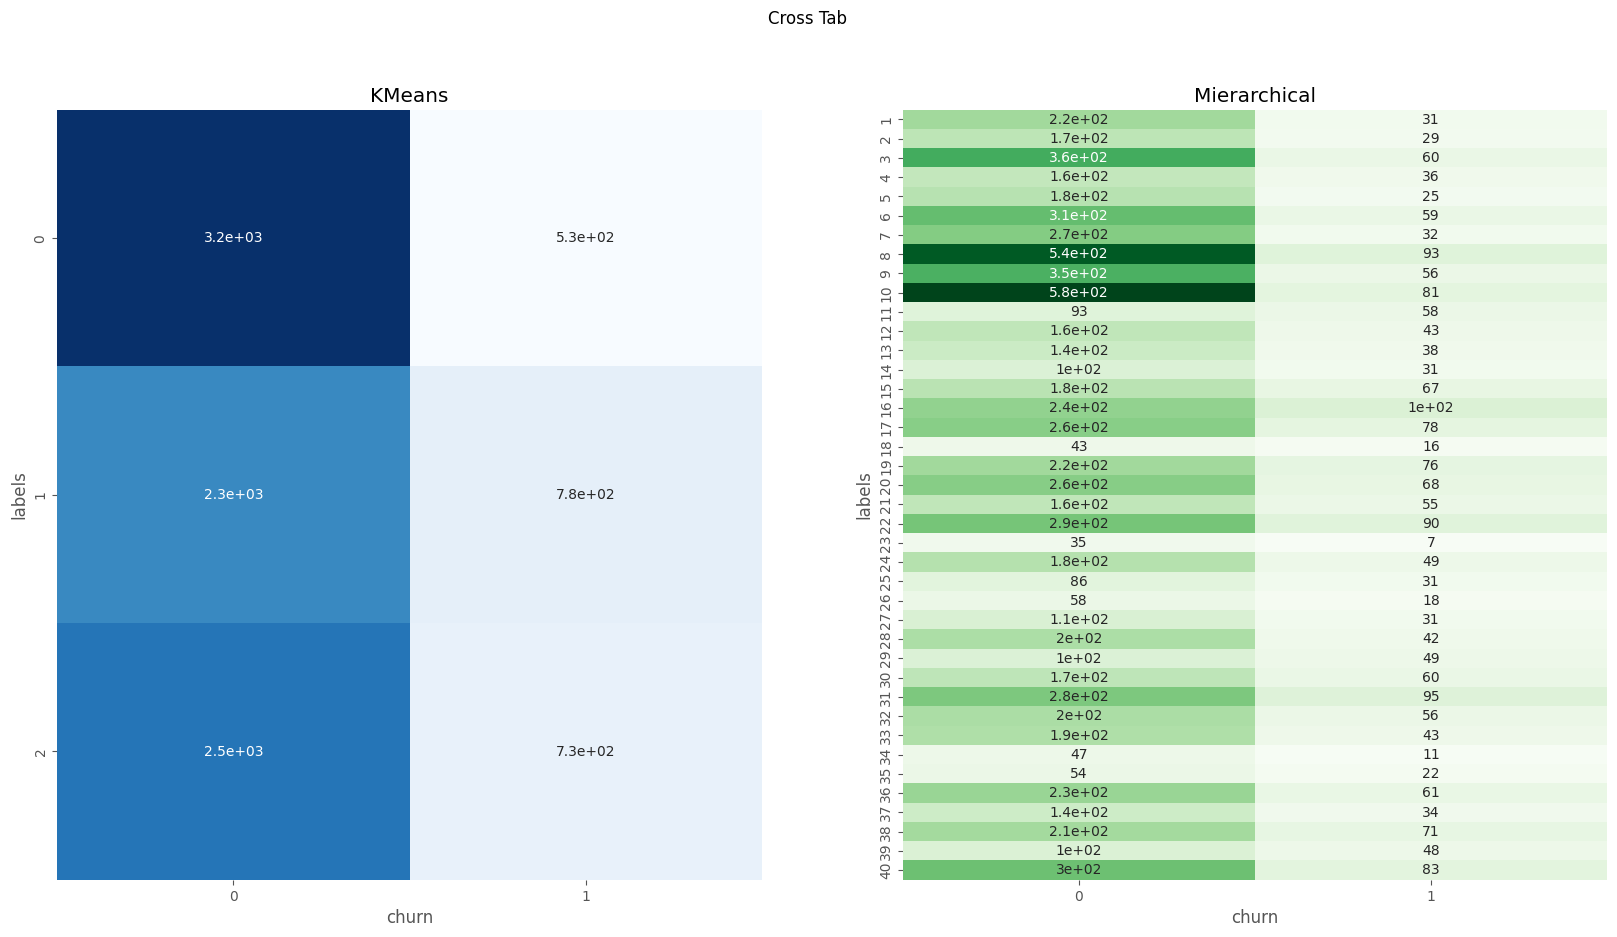

In [158]:
plt.figure(figsize =(20,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ctl, annot=True, cbar=False, cmap='Blues')

plt.subplot(1,2,2)
plt.title("Hierarchical")
sns.heatmap(ct2, annot=True, cbar=False, cmap='Greens')